In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
from sklearn.model_selection import train_test_split

In [2]:
# data: https://libguides.princeton.edu/politics/opinion#s-lg-box-1614076
# data: https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/II2DB6/EARRB5&version=4.1
data = pd.read_stata("Data/cumulative_2006_2018.dta")

In [3]:
data.head()

,year,case_id,weight,weight_cumulative,state,st,cd,dist,dist_up,cong,cong_up,zipcode,county_fips,tookpost,weight_post,rvweight,rvweight_post,starttime,pid3,pid3_leaner,pid7,ideo5,gender,birthyr,age,race,hispanic,educ,faminc,marstat,economy_retro,newsint,approval_pres,approval_rep,approval_sen1,approval_sen2,approval_gov,intent_pres_08,intent_pres_12,intent_pres_16,voted_pres_08,voted_pres_12,voted_pres_16,vv_regstatus,vv_party_gen,vv_party_prm,vv_turnout_gvm,vv_turnout_pvm,intent_rep,intent_rep_party,voted_rep,voted_rep_party,intent_gov,intent_gov_party,voted_gov,voted_gov_party,intent_sen,intent_sen_party,voted_sen,voted_sen_party,intent_rep_chosen,intent_sen_chosen,intent_gov_chosen,voted_rep_chosen,voted_sen_chosen,voted_gov_chosen,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current
0,2006,439219,1.851676,1.667581,North Carolina,NC,NC-10,10,10,109,110,28645,37027,Took Post-Election Survey,NaN,NaN,NaN,2006-10-07 00:02:34,Democrat,Democrat (Including Leaners),Strong Democrat,Liberal,Female,1974,32,White,NaN,High School Graduate,10k - 20k,Divorced,Gotten Worse / Somewhat Worse,NaN,Strongly Disapprove,Strongly Disapprove,Disapprove / Somewhat Disapprove,Strongly Disapprove,Approve / Somewhat Approve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Voted,NaN,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Richard C. Carsner (D),,,Richard C. Carsner (D),,,Patrick T. McHenry (R),20522,Elizabeth Dole (R),40303,Richard Burr (R),29548,Michael Easley (D)
1,2006,439224,0.968308,0.872039,Ohio,OH,OH-3,3,3,109,110,45409,39113,Took Post-Election Survey,NaN,NaN,NaN,2006-10-07 00:02:53,Other,Democrat (Including Leaners),Lean Democrat,Moderate,Male,1957,49,White,NaN,Post-Grad,150k+,Married,Gotten Much Worse,NaN,Strongly Disapprove,Disapprove / Somewhat Disapprove,Strongly Disapprove,Disapprove / Somewhat Disapprove,Disapprove / Somewhat Disapprove,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Voted,NaN,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,Stephanie Studebaker (D),Sherrod C. Brown (D),Ted Strickland (D),Stephanie Studebaker (D),Sherrod C. Brown (D),Ted Strickland (D),Michael R. Turner (R),20342,Mike DeWine (R),15020,George V. Voinovich (R),49903,Bob Taft (R)
2,2006,439228,1.593441,1.435020,New Jersey,NJ,NJ-1,1,1,109,110,08030,34007,Took Post-Election Survey,NaN,NaN,NaN,2006-10-07 00:02:59,Democrat,Democrat (Including Leaners),Strong Democrat,Liberal,Female,1952,54,White,NaN,High School Graduate,30k - 40k,Divorced,Gotten Much Worse,NaN,Strongly Disapprove,Approve / Somewhat Approve,Approve / Somewhat Approve,Approve / Somewhat Approve,Strongly Approve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Record Of Voting,NaN,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,NaN,NaN,NaN,NaN,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,Robert E. Andrews (D),Robert Menendez (D),,Robert E. Andrews (D),Robert Menendez (D),,Robert E. Andrews (D),29132,Robert Menendez (D),29373,Frank R. Lautenberg (D),14914,Jon Corzine (D)
3,2006,439237,1.398529,1.259486,Illinois,IL,IL-9,9,9,109,110,60613,17031,Took Post-Election Survey,NaN,NaN,NaN,2006-10-07 00:03:37,Democrat,Democrat (Including Leaners),Strong Democrat,Liberal,Female,1972,34,Black,NaN,4-Year,Less than 10k,Single / Never Married,Stayed About The Same,NaN,Strongly Disapprove,Approve / Somewhat Approve,Approve / Somewhat Approve,Approve / Somewhat Approve,Approve / Somewhat Approve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Voted,NaN,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,[Democrat / Candidate 1],Democratic,NaN,NaN,NaN,NaN,Janice D. Schakowsky (D),,Rod Blagojevich (D),Janice D. Schakowsky (D),,Rod Blagojevich (D),Janice D. Schakowsky (D),29911,Richard Durbin (D),15021,Ba

In [4]:
data[['year','pid3',]].groupby(['pid3']).agg(['count'])

,year
,count
pid3,
Democrat,160637
Republican,118907
Independent,126270
Other,17975
Not Sure,20012


In [5]:
data[['year','pid7']].groupby(['pid7']).agg(['count'])

,year
,count
pid7,
Strong Democrat,107733
Not Very Strong Democrat,54838
Lean Democrat,45411
Independent,60946
Lean Republican,47739
Not Very Strong Republican,43810
Strong Republican,75782
Not Sure,13480


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf4a957890>,
      dtype=object)

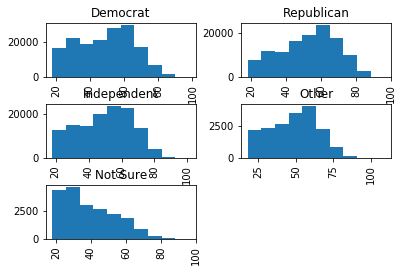

In [6]:
data['age'].hist(by=data['pid3'])

In [7]:
data[['year','pid3','pid7','ideo5']].groupby(['pid3','pid7','ideo5']).agg(['count'])

year
                                                          count
pid3        pid7                       ideo5                   
Democrat    Strong Democrat            Very Liberal       26618
                                       Liberal            40631
                                       Moderate           25826
                                       Conservative        5596
                                       Very Conservative   2261
                                       Not Sure            3834
            Not Very Strong Democrat   Very Liberal        2663
                                       Liberal            15743
                                       Moderate           24930
                                       Conservative        5169
                                       Very Conservative    734
                                       Not Sure            3905
            Lean Democrat              Very Liberal         114
                                       Liberal              276
                                       Moderate             364
                                       Conservative          33
                                       Very Conservative     15
                                       Not Sure              49
            Independent                Very Liberal          12
                                       Liberal               30
                                       Moderate              86
                                       Conservative          37
                                       Very Conservative     13
                                       Not Sure              47
            Lean Republican            Very Liberal           2
                                       Liberal                8
                                       Moderate              24
                                       Conservative          34
                                       Very Conservative      7
                                       Not Sure               2
            Not Very Strong Republican Very Liberal           3
                                       Liberal                8
                                       Moderate              29
                                       Conservative          11
                                       Very Conservative      4
            Strong Republican          Very Liberal           2
                                       Liberal                8
                                       Moderate               4
                                       Conservative           6
                                       Very Conservative      8
                                       Not Sure               3
            Not Sure                   Very Liberal           3
                                       Liberal                3
                                       Moderate              26
                                       Conservative          16
                                       Very Conservative      6
                                       Not Sure              95
Republican  Strong Democrat            Very Liberal           7
                                       Liberal                7
                                       Moderate              13
                                       Conservative          29
                                       Very Conservative     16
            Not Very Strong Democrat   Very Liberal           2
                                       Liberal               10
                                       Moderate              55
                                       Conservative          33
                                       Very Conservative     12
                                       Not Sure               4
            Lean Democrat              Very Liberal           4
                                       Liberal                9
                           

In [8]:
data[['year','pid3']].groupby(['year']).agg(['count'])

,pid3
,count
year,
2006,36364
2007,9946
2008,32800
2009,13800
2010,46684
2011,20150
2012,54535
2013,16399


Filter to 2018 Data 

In [9]:
inputs = ['year','st','gender', 'age', 'race', 'hispanic', 'educ', 'faminc', 'marstat', 'economy_retro', 'newsint','approval_pres']
targets = ['pid3', 'pid3_leaner', 'pid7', 'ideo5']
keep = inputs + targets

recent = data[data.year == 2018]

recent = recent[keep]


In [10]:
recent.head()

,year,st,gender,age,race,hispanic,educ,faminc,marstat,economy_retro,newsint,approval_pres,pid3,pid3_leaner,pid7,ideo5
392755,2018,TX,Female,45,Black,No,Some College,10k - 20k,Separated,Gotten Much Worse,Don't Know,Disapprove / Somewhat Disapprove,Independent,Independent (Excluding Leaners),Independent,Not Sure
392756,2018,OH,Female,58,White,No,Post-Grad,150k+,Married,Stayed About The Same,Only Now And Then,Approve / Somewhat Approve,Republican,Republican (Including Leaners),Strong Republican,Conservative
392757,2018,KY,Female,66,White,No,Post-Grad,10k - 20k,Divorced,Stayed About The Same,Most Of The Time,Strongly Disapprove,Democrat,Democrat (Including Leaners),Strong Democrat,Liberal
392758,2018,AZ,Female,88,White,No,High School Graduate,20k - 30k,Widowed,Gotten Much Better,Some Of The Time,Approve / Somewhat Approve,Republican,Republican (Including Leaners),Strong Republican,Moderate
392759,2018,PA,Female,59,White,No,Post-Grad,10k - 20k,Divorced,Gotten Better / Somewhat Better,Most Of The Time,Disapprove / Somewhat Disapprove,Independent,Democrat (Including Leaners),Lean Democrat,Liberal


In [11]:
recent.shape

(60000, 16)

In [12]:
recent[['year','pid7']].groupby(['pid7']).agg(['count'])

,year
,count
pid7,
Strong Democrat,14222
Not Very Strong Democrat,7223
Lean Democrat,6162
Independent,8532
Lean Republican,5736
Not Very Strong Republican,5927
Strong Republican,10057
Not Sure,2050


In [13]:
recent[['year','pid3']].groupby(['pid3']).agg(['count'])

,year
,count
pid3,
Democrat,21462
Republican,16000
Independent,16676
Other,2538
Not Sure,3270


In [14]:
recent[['year','pid3_leaner']].groupby(['pid3_leaner']).agg(['count'])

,year
,count
pid3_leaner,
Democrat (Including Leaners),27607
Republican (Including Leaners),21720
Independent (Excluding Leaners),8532
Not Sure,2050


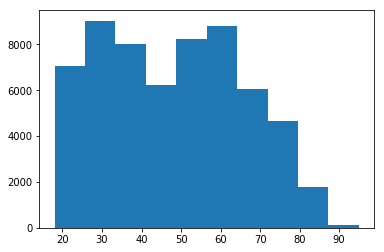

In [15]:
#recent.age.hist()

plt.hist(recent.age, bins = 10)
plt.show()

In [16]:
recent.loc[ (recent['age'] >= 18) & (recent['age'] <= 29), 'age_band'] = 'Young'
recent.loc[ (recent['age'] >= 30) & (recent['age'] <= 49), 'age_band'] = 'Lower-Middle'
recent.loc[ (recent['age'] >= 50) & (recent['age'] <= 69), 'age_band'] = 'Upper-Middle'
recent.loc[ (recent['age'] >= 70) , 'age_band'] = 'Old'

In [17]:
recent.drop('age', axis=1, inplace=True)

In [18]:
categorical2 = ['st','gender', 'age_band', 'race', 'hispanic', 'educ', 'faminc', 'marstat', 'economy_retro', 'newsint','approval_pres']


In [19]:
for var in categorical2:
    df = recent[['year', var]].groupby([var]).agg(['count'])
    print(df.head())


    year
   count
st      
AL   932
AK    97
AZ  1588
AR   521
CA  5284
         year
        count
gender       
Male    25829
Female  34171
               year
              count
age_band           
Lower-Middle  19204
Old            8170
Upper-Middle  20555
Young         12071
                  year
                 count
race                  
White            45011
Black             5631
Hispanic          4965
Asian             1799
Native American    447
           year
          count
hispanic       
Yes        2019
No        57980
                       year
                      count
educ                       
No HS                  2158
High School Graduate  16617
Some College          12631
2-Year                 6022
4-Year                14256
               year
              count
faminc             
Less than 10k  2900
10k - 20k      4365
20k - 30k      5843
30k - 40k      6142
40k - 50k      5281
                         year
                        count
marstat   

In [20]:
recent.head(5)


,year,st,gender,race,hispanic,educ,faminc,marstat,economy_retro,newsint,approval_pres,pid3,pid3_leaner,pid7,ideo5,age_band
392755,2018,TX,Female,Black,No,Some College,10k - 20k,Separated,Gotten Much Worse,Don't Know,Disapprove / Somewhat Disapprove,Independent,Independent (Excluding Leaners),Independent,Not Sure,Lower-Middle
392756,2018,OH,Female,White,No,Post-Grad,150k+,Married,Stayed About The Same,Only Now And Then,Approve / Somewhat Approve,Republican,Republican (Including Leaners),Strong Republican,Conservative,Upper-Middle
392757,2018,KY,Female,White,No,Post-Grad,10k - 20k,Divorced,Stayed About The Same,Most Of The Time,Strongly Disapprove,Democrat,Democrat (Including Leaners),Strong Democrat,Liberal,Upper-Middle
392758,2018,AZ,Female,White,No,High School Graduate,20k - 30k,Widowed,Gotten Much Better,Some Of The Time,Approve / Somewhat Approve,Republican,Republican (Including Leaners),Strong Republican,Moderate,Old
392759,2018,PA,Female,White,No,Post-Grad,10k - 20k,Divorced,Gotten Better / Somewhat Better,Most Of The Time,Disapprove / Somewhat Disapprove,Independent,Democrat (Including Leaners),Lean Democrat,Liberal,Upper-Middle


In [21]:
recent.isna().sum()

year               0
st                 0
gender             0
race               0
hispanic           1
educ               0
faminc           339
marstat           22
economy_retro     82
newsint          385
approval_pres     33
pid3              54
pid3_leaner       91
pid7              91
ideo5            419
age_band           0
dtype: int64

In [22]:
recent.dropna(axis=0, how='any',inplace=True)

In [23]:
recent.shape

(59272, 16)

In [24]:
# Split Data into Target and Inputs 

X2 = recent[categorical2]

#y2 = recent.loc[:,'pid7']
y2 = recent.loc[:,'pid3']
#y2 = recent.loc[:, 'ideo5']

In [25]:
X2.head()

,st,gender,age_band,race,hispanic,educ,faminc,marstat,economy_retro,newsint,approval_pres
392755,TX,Female,Lower-Middle,Black,No,Some College,10k - 20k,Separated,Gotten Much Worse,Don't Know,Disapprove / Somewhat Disapprove
392756,OH,Female,Upper-Middle,White,No,Post-Grad,150k+,Married,Stayed About The Same,Only Now And Then,Approve / Somewhat Approve
392757,KY,Female,Upper-Middle,White,No,Post-Grad,10k - 20k,Divorced,Stayed About The Same,Most Of The Time,Strongly Disapprove
392758,AZ,Female,Old,White,No,High School Graduate,20k - 30k,Widowed,Gotten Much Better,Some Of The Time,Approve / Somewhat Approve
392759,PA,Female,Upper-Middle,White,No,Post-Grad,10k - 20k,Divorced,Gotten Better / Somewhat Better,Most Of The Time,Disapprove / Somewhat Disapprove


In [26]:
y2.head()

392755    Independent
392756     Republican
392757       Democrat
392758     Republican
392759    Independent
Name: pid3, dtype: category
Categories (5, object): [Democrat < Republican < Independent < Other < Not Sure]

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder(sparse=False)

X_encoded2 = pd.DataFrame(encoder2.fit_transform(X2[categorical2]))

X_encoded2.columns = encoder2.get_feature_names(categorical2)

#X2.drop(categorical2, axis = 1, inplace = True)

#print(X2.shape)
print(X_encoded2.shape)
#OH_X2 = pd.concat([X2, pd.DataFrame(X_encoded2, index=X2.index)], axis = 1)

#print(OH_X2.shape)

(59272, 108)


In [28]:
#X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(OH_X2, y2, test_size = .30, train_size = .70, random_state = 42)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_encoded2, y2, test_size = .30, train_size = .70, random_state = 42)


print(X_Train2.shape)
print(X_Test2.shape)
print(Y_Train2.shape)
print(Y_Test2.shape)

(41490, 108)
(17782, 108)
(41490,)
(17782,)


In [29]:
X_Train2.head()

,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,st_DE,st_FL,st_GA,st_HI,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_MT,st_NC,st_ND,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,gender_Female,gender_Male,age_band_Lower-Middle,age_band_Old,age_band_Upper-Middle,age_band_Young,race_Asian,race_Black,race_Hispanic,race_Middle Eastern,race_Mixed,race_Native American,race_Other,race_White,hispanic_No,hispanic_Yes,educ_2-Year,educ_4-Year,educ_High School Graduate,educ_No HS,educ_Post-Grad,educ_Some College,faminc_100k - 120k,faminc_10k - 20k,faminc_120k - 150k,faminc_150k+,faminc_20k - 30k,faminc_30k - 40k,faminc_40k - 50k,faminc_50k - 60k,faminc_60k - 70k,faminc_70k - 80k,faminc_80k - 100k,faminc_Less than 10k,faminc_Prefer not to say,marstat_Divorced,marstat_Domestic Partnership,marstat_Married,marstat_Separated,marstat_Single / Never Married,marstat_Widowed,economy_retro_Gotten Better / Somewhat Better,economy_retro_Gotten Much Better,economy_retro_Gotten Much Worse,economy_retro_Gotten Worse / Somewhat Worse,economy_retro_Not Sure,economy_retro_Stayed About The Same,newsint_Don't Know,newsint_Hardly At All,newsint_Most Of The Time,newsint_Only Now And Then,newsint_Some Of The Time,approval_pres_Approve / Somewhat Approve,approval_pres_Disapprove / Somewhat Disapprove,approval_pres_Never Heard / Not Sure,approval_pres_Strongly Approve,approval_pres_Strongly Disapprove
19662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5642,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_Train2, Y_Train2)

Y_Pred2 = classifier.predict(X_Test2)
print(Y_Pred2)


['Democrat' 'Independent' 'Democrat' ... 'Democrat' 'Democrat' 'Democrat']


In [31]:
from sklearn.metrics import accuracy_score 

print(accuracy_score(y_true = Y_Test2, y_pred = Y_Pred2))

0.477674052412552
